In [55]:
"""

generate GeoJSON layers for mapping data

"""
import os
import sys
import pandas as pd
import geopandas as gpd
import logging
from shapely.geometry import Point, MultiPolygon, Polygon
from geopandas.tools import sjoin
from polylabel import polylabel

logging.basicConfig(level=logging.INFO)


ELECTORAL_BOUNDARIES_2019 = "data/boundaries/2019/COM_ELB_region.shp"
ELECTORAL_BOUNDARIES_2016 = "data/boundaries/2016/COM_ELB.TAB"

if not ELECTORAL_BOUNDARIES_2016 or not os.path.isfile(ELECTORAL_BOUNDARIES_2016):
    raise Exception("Require electoral boundaries shapefile .. check README")

boundaries = gpd.read_file(ELECTORAL_BOUNDARIES_2016)

# for _, electorate in boundaries.iterrows():
#     print(electorate.geometry)

INFO:fiona.ogrext:Failed to auto identify EPSG: 7


In [24]:
# polylabel()
help(boundaries.loc[1].geometry)


Help on MultiPolygon in module shapely.geometry.multipolygon object:

class MultiPolygon(shapely.geometry.base.BaseMultipartGeometry)
 |  MultiPolygon(polygons=None, context_type='polygons')
 |  
 |  A collection of one or more polygons
 |  
 |  If component polygons overlap the collection is `invalid` and some
 |  operations on it may fail.
 |  
 |  Attributes
 |  ----------
 |  geoms : sequence
 |      A sequence of `Polygon` instances
 |  
 |  Method resolution order:
 |      MultiPolygon
 |      shapely.geometry.base.BaseMultipartGeometry
 |      shapely.geometry.base.BaseGeometry
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, polygons=None, context_type='polygons')
 |      Parameters
 |      ----------
 |      polygons : sequence
 |          A sequence of (shell, holes) tuples where shell is the sequence
 |          representation of a linear ring (see linearring.py) and holes is
 |          a sequence of such linear rings
 |      
 |      Example
 

In [30]:
help(boundaries.loc[1].geometry[0])

Help on Polygon in module shapely.geometry.polygon object:

class Polygon(shapely.geometry.base.BaseGeometry)
 |  Polygon(shell=None, holes=None)
 |  
 |  A two-dimensional figure bounded by a linear ring
 |  
 |  A polygon has a non-zero area. It may have one or more negative-space
 |  "holes" which are also bounded by linear rings. If any rings cross each
 |  other, the feature is invalid and operations on it may fail.
 |  
 |  Attributes
 |  ----------
 |  exterior : LinearRing
 |      The ring which bounds the positive space of the polygon.
 |  interiors : sequence
 |      A sequence of rings which bound all existing holes.
 |  
 |  Method resolution order:
 |      Polygon
 |      shapely.geometry.base.BaseGeometry
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __init__(self, shell=None, holes=None)
 |      Parameters
 |      ----------
 |      shell : sequence
 |          A sequence of (x, y [,z]) numeric co

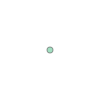

In [48]:
a = [list(boundaries.loc[1].geometry[x].exterior.coords) for x in range(0, len(boundaries.loc[1].geometry.geoms))]
Point(polylabel(a))

In [67]:
def get_centroid(geometry):
    if type(geometry) is MultiPolygon:
        p = [list(geometry[x].exterior.coords) for x in range(0, len(geometry.geoms))]
        return Point(polylabel(p))
    elif type(geometry) is Polygon:
        p = [list(geometry.exterior.coords)]
        return Point(polylabel(p))

# get_centroid(boundaries.loc[146].geometry)
boundaries["geometry"] = boundaries["geometry"].apply(get_centroid)
# boundaries["centroid"].plot()

# boundaries


In [78]:
# import fiona; fiona.supported_drivers
# boundaries.drop(["Elect_div", "Numccds", "Actual", "Projected", "Total_Population", "Australians_Over_18", "Area_SqKm"], inplace=True, axis="columns")

# boundaries
boundaries.to_file("countries.geojson", driver='GeoJSON')
# boundaries.plot()
# boundaries.drop(["centroid"], inplace=True, axis="columns")
